In [1]:
import pandas as pd
import numpy as np

# Load the processed data
df = pd.read_pickle("../data/data_with_sentiment.pkl")

In [2]:
df.head()

,processed_comment,commentId,docketId,documentId,postedDate,agency,embedding,topic,probability,topic_label,sentiment_score,sentiment_label,sentiment_text
0,RE Docket EPAR10OAR20190710 Federal Register N...,EPA-R10-OAR-2019-0710-0076,EPA-R10-OAR-2019-0710,NaN,2020-02-28 05:00:00+00:00,EPA,"[-0.05332227051258087, 0.04287220537662506, 0....",2052,0.935041,2052_psd_hydrofluoric_interpretation_ghgs,0.259362,0,NEUTRAL
1,"People ask why the EPA is gutting regulations,...",EPA-R10-OAR-2019-0710-0077,EPA-R10-OAR-2019-0710,NaN,2020-02-28 05:00:00+00:00,EPA,"[0.018710996955633163, -0.03339751437306404, 0...",-1,0.000000,-1_exceeded_brain_concern_profenofos,-0.400254,-1,NEGATIVE
2,Cache Valley needs access to Tier 3 gasoline A...,EPA-R10-OAR-2020-0190-0016,EPA-R10-OAR-2020-0190,NaN,2021-02-24 05:00:00+00:00,EPA,"[0.013201002031564713, 0.05592118576169014, -0...",-1,0.000000,-1_exceeded_brain_concern_profenofos,0.354930,0,NEUTRAL
3,While attainment may appear to have been achie...,EPA-R10-OAR-2020-0190-0017,EPA-R10-OAR-2020-0190,NaN,2021-02-24 05:00:00+00:00,EPA,"[0.017910832539200783, 0.013244988396763802, 0...",-1,0.000000,-1_exceeded_brain_concern_profenofos,-0.704482,-1,NEGATIVE
4,Yes. I agree that we should commend achievemen...,EPA-R10-OAR-2020-0190-0018,EPA-R10-OAR-2020-0190,NaN,2021-02-24 05:00:00+00:00,EPA,"[0.010062928311526775, 0.0010834492277354002, ...",-1,0.000000,-1_exceeded_brain_concern_profenofos,0.470450,1,POSITIVE


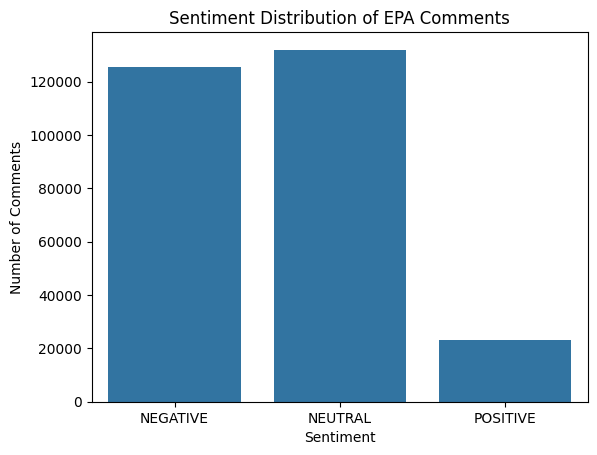

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_text', data=df, order=["NEGATIVE", "NEUTRAL", "POSITIVE"])
plt.title("Sentiment Distribution of EPA Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


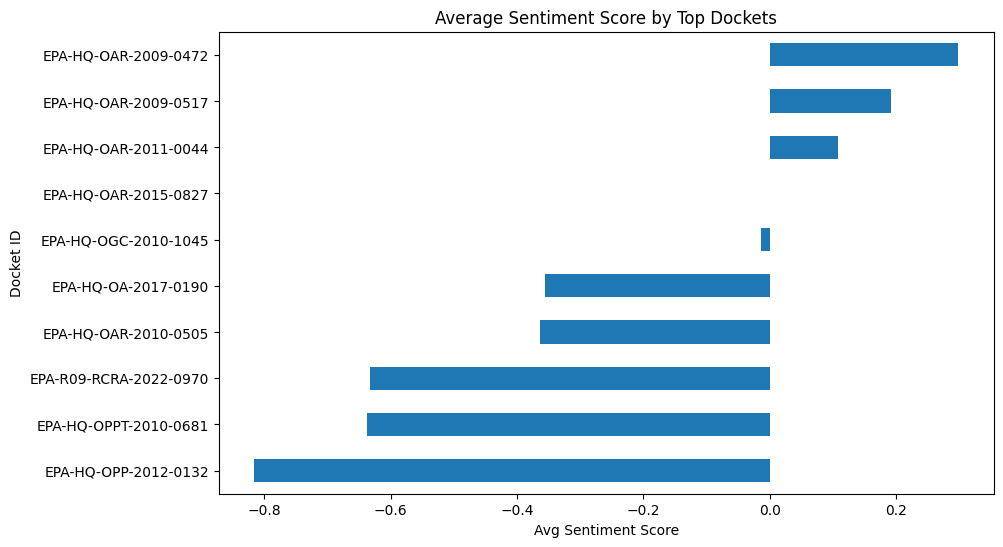

In [4]:
top_dockets = df["docketId"].value_counts().head(10).index
docket_sentiment = df[df["docketId"].isin(top_dockets)].groupby("docketId")["sentiment_score"].mean().sort_values()

docket_sentiment.plot(kind="barh", title="Average Sentiment Score by Top Dockets", figsize=(10, 6))
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Docket ID")
plt.show()


/tmp/ipykernel_495159/3266698866.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["postedDate"].dt.to_period("M")


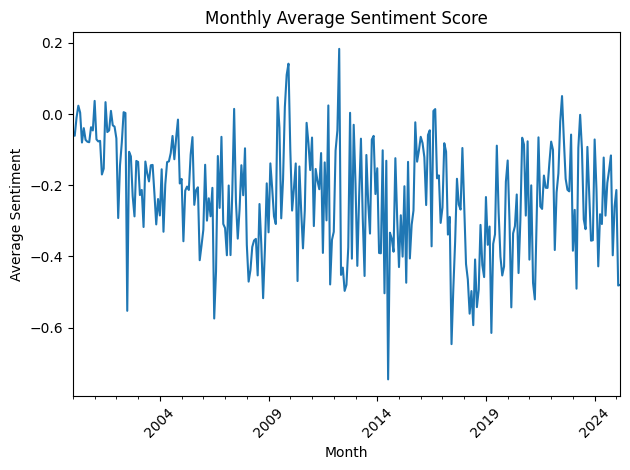

In [6]:
df["postedDate"] = pd.to_datetime(df["postedDate"])
df["month"] = df["postedDate"].dt.to_period("M")
monthly_sentiment = df.groupby("month")["sentiment_score"].mean()

monthly_sentiment.plot(title="Monthly Average Sentiment Score")
plt.ylabel("Average Sentiment")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


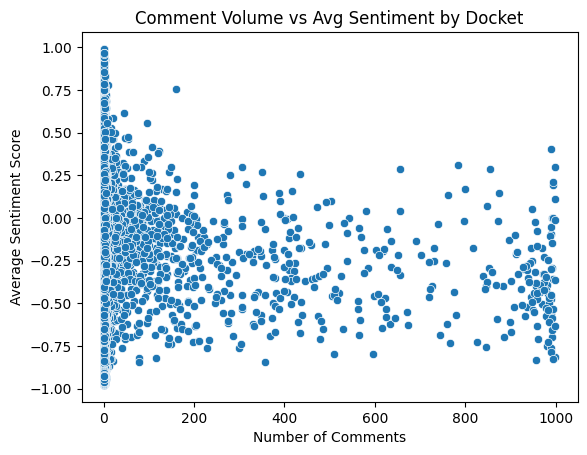

In [9]:
summary = df.groupby("docketId").agg(
    avg_sentiment=("sentiment_score", "mean"),
    comment_count=("commentId", "count")
)

sns.scatterplot(data=summary, x="comment_count", y="avg_sentiment")
plt.title("Comment Volume vs Avg Sentiment by Docket")
plt.xlabel("Number of Comments")
plt.ylabel("Average Sentiment Score")
plt.show()


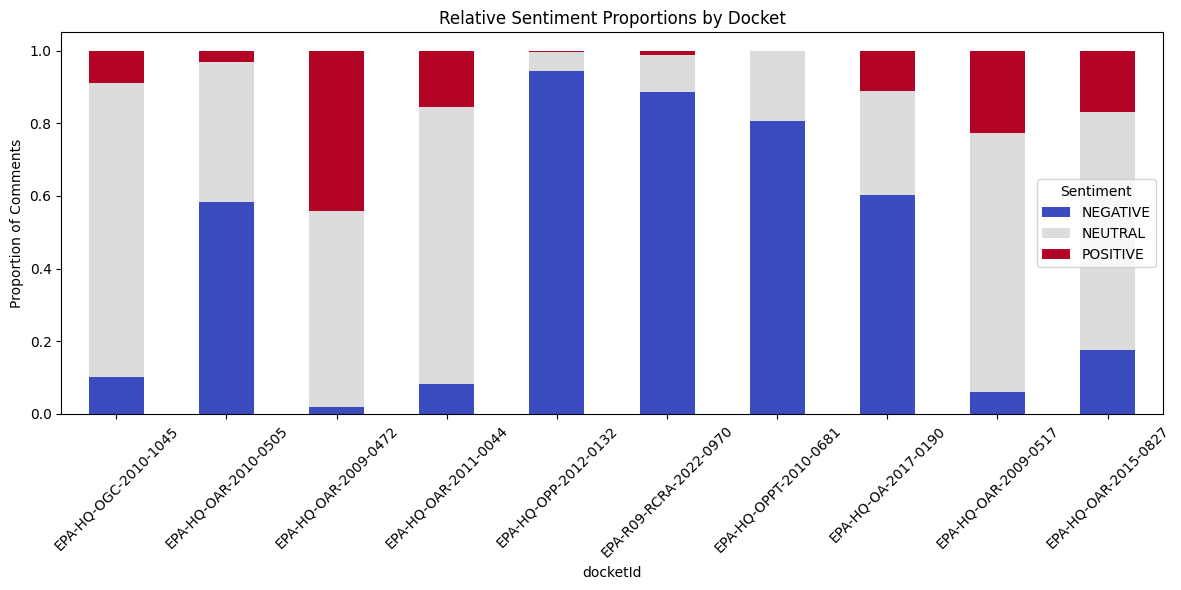

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure sentiment_text column exists
assert "sentiment_text" in df.columns

# Step 1: Count sentiment per docket
docket_sentiment_counts = df.groupby(["docketId", "sentiment_text"]).size().reset_index(name="count")

# Step 2: Pivot into wide format
pivot_df = docket_sentiment_counts.pivot(index="docketId", columns="sentiment_text", values="count").fillna(0)

# Step 3: Normalize to proportions
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 4: Pick top N dockets to visualize
top_dockets = df["docketId"].value_counts().head(10).index
proportions_df = proportions_df.loc[top_dockets]

# Step 5: Plot as stacked bar chart
proportions_df[["NEGATIVE", "NEUTRAL", "POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="coolwarm"
)

plt.ylabel("Proportion of Comments")
plt.title("Relative Sentiment Proportions by Docket")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
